In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
database = pd.read_csv('database/airbnb.csv')

In [53]:
duplicated_rows = database.duplicated()
print(duplicated_rows.any())

False


In [54]:
database.columns

Index(['id', 'title', 'description', 'typeDescription', 'roomType',
       'discountedPrice', 'price', 'originalPrice', 'day5Price', 'url',
       'ratingValue', 'ratingReviewsCount', 'ratingGuestSatisfaction',
       'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy',
       'ratingLocation', 'hostID', 'hostName', 'hostAbout', 'hostRating',
       'hostIsSuper', 'hostTimeResponse', 'hostResponseRate', 'latitude',
       'longitude', 'highlights', 'highlightsHost', 'highlightsLocation',
       'origin'],
      dtype='object')

In [55]:
# Remover "R$" e converter colunas de preço para float
def convert_price(value):
    """Remove o símbolo 'R$' e converte para float"""
    return float(value.replace("R$", "").replace(",", "").strip()) if isinstance(value, str) else value

In [56]:
database['discountedPrice'] = database['discountedPrice'].apply(convert_price)
database['price'] = database['price'].apply(convert_price)
database['originalPrice'] = database['originalPrice'].apply(convert_price)
database['day5Price'] = database['day5Price'].apply(convert_price)

## 1. Mapeamento ##

In [57]:
import folium
from folium.plugins import MarkerCluster

In [58]:
# visualização com base nas médias das latitudes e longitudes
map_center_lat= database['latitude'].mean()
map_center_log= database['longitude'].mean()

#criação e atribuição do mapa a variável map_stm
map_geral = folium.Map((map_center_lat, map_center_log), tiles="cartodb positron", control_scale=True,)
#(latitude,longitude)

In [59]:
marker_cluster = MarkerCluster().add_to(map_geral)

# iterrows() -> (indíce, linha)
for i, row in database.iterrows():
    try: 
        lat = row['latitude']
        lon = row['longitude']

        # verificação se os valores em lat e lon são números e se são int ou float, caso seja avaliado como invalido irá pular (continue) a coordenada da linha
        if pd.isna(lat) or pd.isna(lon) or not (isinstance(lat, (int,float)) and isinstance(lon, (int, float))): 
            continue

        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)

    except (KeyError, TypeError) as e:
        print(f"Erro processando linha de index {i}:{e}")
        continue


In [60]:
map_geral

## 2. Avaliações ##

In [61]:
origin_room_type_counts = database.groupby(['origin', 'roomType']).size().unstack(fill_value=0)
print("Quantidade de tipos de hospedagem por origem:")
print(origin_room_type_counts)

Quantidade de tipos de hospedagem por origem:
roomType  Entire home/apt  Private room  Shared room
origin                                              
blm                   277           130            6
stm                   306           141            6


### Correlação entre Avaliações e Preço ###

In [62]:
database.head(10)

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostRating,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.0,NaN,1.71,https://www.airbnb.com/rooms/23562655?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.0,NaN,2.06,https://www.airbnb.com/rooms/91296753376758295...,...,4.96,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.0,NaN,575.00,https://www.airbnb.com/rooms/12538779015080127...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.0,NaN,530.00,https://www.airbnb.com/rooms/10059376180958668...,...,4.93,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.0,78.0,330.00,https://www.airbnb.com/rooms/13103943459383978...,...,4.91,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm
5,35282485,Quarto silencioso próximo ao Bosque,Ambiente familiar calmo e aconchegante.O quart...,"Quarto em Marco, Brasil",Private room,NaN,119.0,NaN,505.00,https://www.airbnb.com/rooms/35282485?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.433770,-48.459260,"['No top 5% das acomodações', 'Quarto em apart...","['Idiomas: francês', 'Moro em: State of Pará, ...","['Bairro residencial, tranquilo, com local pró...",blm
6,1327049905751092176,Quarto com excelente localização,Suíte ampla e aconchegante com entrada lateral...,"Quarto em Belém, Brasil",Private room,NaN,145.0,NaN,618.00,https://www.airbnb.com/rooms/13270499057510921...,...,5.00,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.396890,-48.474600,"['Quarto em casa', 'Experiência de check-in ex...","['Nasci na década de 90', 'Meu trabalho: Empre...","[nan, nan]",blm
7,41744419,"STUDIO 306 | WIFI 600MB | RESIDENCIAL JC, um l...","O apartamento 306 é aconchegante, alinhado e o...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,201.0,NaN,995.00,https://www.airbnb.com/rooms/41744419?locale=p...,...,4.93,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.462184,-48.488110,"['Self check-in', 'Ótima localização', 'Cancel...",['Meu trabalho: Jc Residencial e Administração...,['Estamos localizados no coração de Batista Ca...,blm
8,791310251933878840,Quarto na melhor localização,Sejam bem-vindos! 🤍 LEIA A ABA REGRAS DA CASA ...,"Quarto em Belém, Brasil",Private room,62.0,62.0,75.0,330.00,https://www.airbnb

In [63]:
database['originalPrice'] = database['originalPrice'].fillna(database['price'])

In [64]:
database

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostRating,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.000,423.000,1.710,https://www.airbnb.com/rooms/23562655?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.000,518.000,2.060,https://www.airbnb.com/rooms/91296753376758295...,...,4.96,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.000,135.000,575.000,https://www.airbnb.com/rooms/12538779015080127...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.000,135.000,530.000,https://www.airbnb.com/rooms/10059376180958668...,...,4.93,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.000,78.000,330.000,https://www.airbnb.com/rooms/13103943459383978...,...,4.91,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1328353590628975017,Alterlar Casa de Praia em Alter do Chão,Opção perfeita para você e sua família que que...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,843.0,1.023,1.023,4.500,https://www.airbnb.com/rooms/13283535906289750...,...,0.00,False,NaN,NaN,-2.502640,-54.945950,"['Caminhada de 1 minuto até o lago', 'Comodida...","['Meu trabalho: Dentista', nan, nan, nan, nan]","[nan, nan]",stm
862,45629422,Casa em Alter do Chão no Centro acesso as praias.,- Garagem pra 3 carros;- Quarto 1 com uma cama...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,3.000,https://www.airbnb.com/rooms/45629422?locale=p...,...,4.89,False,Responde em até 1 hora,Taxa de resposta: 100%,-2.503330,-54.953490,"['Fique no fresquinho', 'Comodidades ao ar liv...","['Moro em: Santarém, Brasil', nan, nan, nan, nan]","['A casa fica no centro de Alter do Chão, na r...",stm
863,1091261682652318404,Suíte casal,Este lugar cheio de estilo fica perto de desti...,"Quarto em hotel em Santarém, Brasil",Private room,348.0,421.000,421.000,1.830,https://www.airbnb.com/rooms/10912616826523184...,...,5.00,False,Responde em até um dia,Taxa de resposta: 67%,-2.511220,-54.949550,"['Self check-in', 'Comodidades ao ar livre', '...","['Nasci na década de 70', 'Onde estudei: Unive...","[nan, nan]",stm
864,1198601539719395137,Sobrado Alter.,Abrace a natureza sem abrir mão do conforto e ...,"Espaço intei

In [66]:
correlation_price = database[['discountedPrice', 'originalPrice', 'ratingValue']].corr()

print("Correlação entre Preço e Avaliações:")
print(correlation_price)

Correlação entre Preço e Avaliações:
                 discountedPrice  originalPrice  ratingValue
discountedPrice         1.000000       0.679777    -0.109781
originalPrice           0.679777       1.000000    -0.094315
ratingValue            -0.109781      -0.094315     1.000000


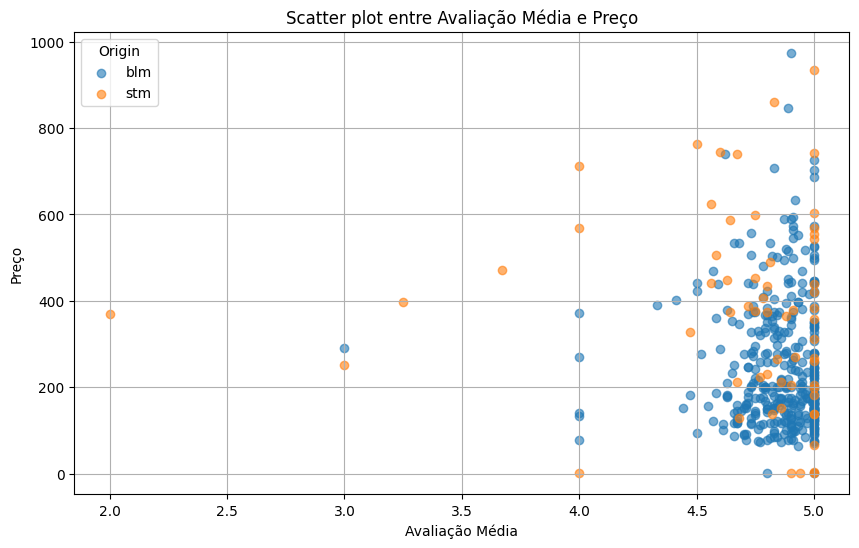

In [68]:
# Scatter plot entre ratingValue e originalPrice
plt.figure(figsize=(10, 6))
for origin in database['origin'].unique():
    subset = database[database['origin'] == origin]
    plt.scatter(subset['ratingValue'], subset['originalPrice'], label=origin, alpha=0.6)

plt.title('Scatter plot entre Avaliação Média e Preço')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

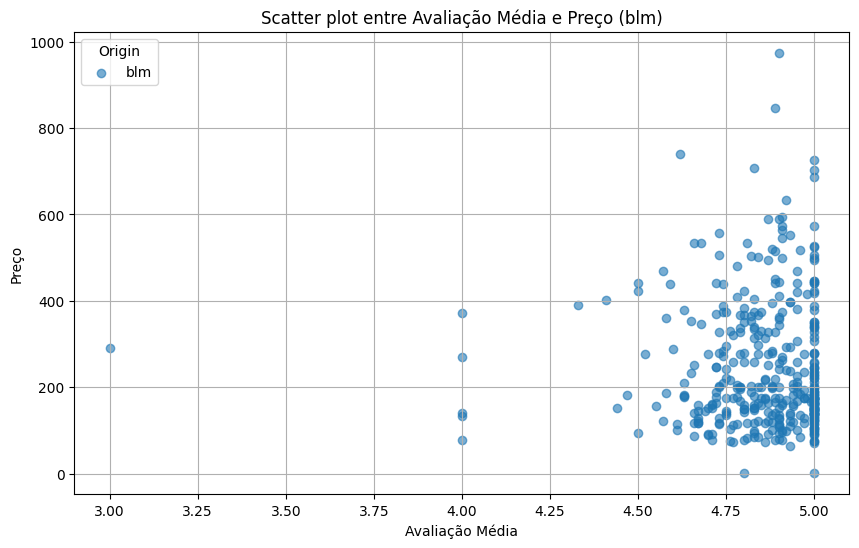

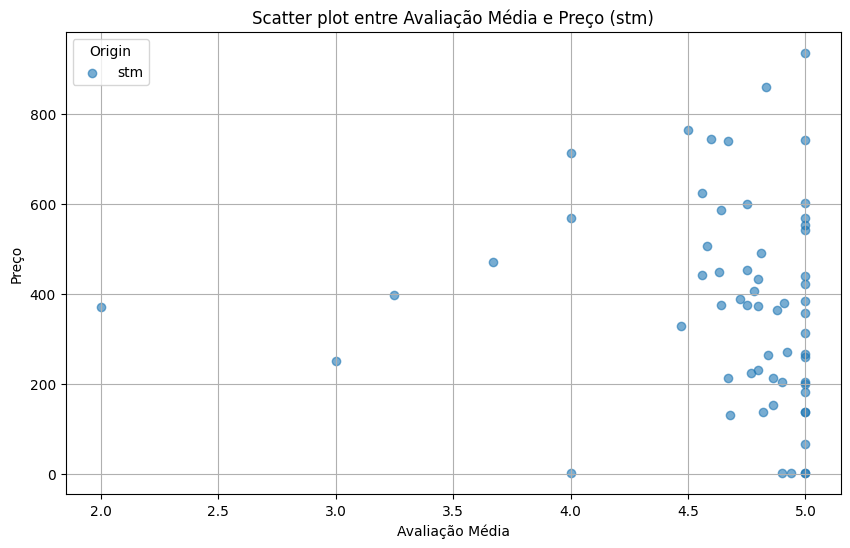

In [69]:
# Filtrar dados para origin == 'blm' e origin == 'stm'
blm_data = database[database['origin'] == 'blm']
stm_data = database[database['origin'] == 'stm']

# Gráfico de dispersão para origin == 'blm'
plt.figure(figsize=(10, 6))
plt.scatter(blm_data['ratingValue'], blm_data['originalPrice'], label='blm', alpha=0.6)
plt.title('Scatter plot entre Avaliação Média e Preço (blm)')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

# Gráfico de dispersão para origin == 'stm'
plt.figure(figsize=(10, 6))
plt.scatter(stm_data['ratingValue'], stm_data['originalPrice'], label='stm', alpha=0.6)
plt.title('Scatter plot entre Avaliação Média e Preço (stm)')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

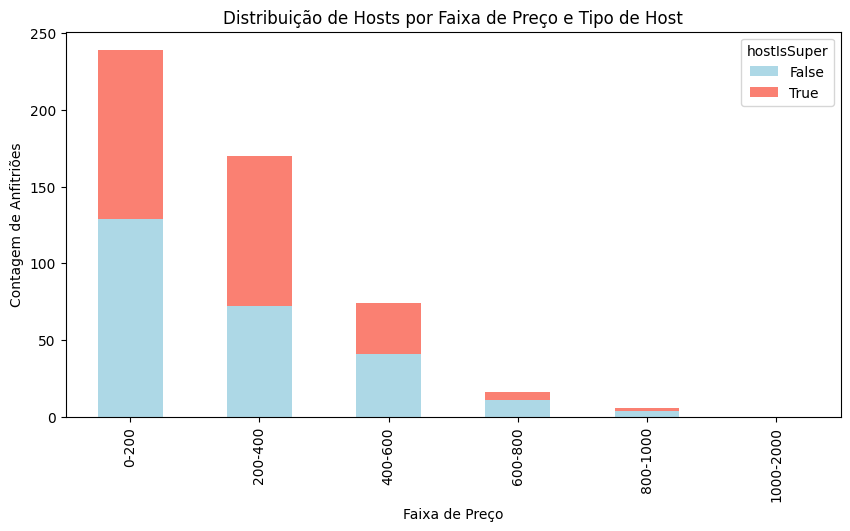

In [79]:
# Classificando as faixas de preço
database['priceCategory'] = pd.cut(database['originalPrice'], bins=[0, 200, 400, 600, 800, 1000, 2000], labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-2000'])

# Gráfico de Barras Empilhadas
price_stack = database.groupby(['priceCategory', 'hostIsSuper'], observed=False).size().unstack().fillna(0)
price_stack.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightblue', 'salmon'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Contagem de Anfitriões')
plt.title('Distribuição de Hosts por Faixa de Preço e Tipo de Host')
plt.show()

## 3. Distribuição dos Preços das Hospedagens ##

In [80]:
import statsmodels.api as sm

# Selecionar as colunas de características e a coluna alvo
X = database[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y = database.loc[X.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          3.04e-186
Time:                        21:33:14   Log-Likelihood:                 296.18
No. Observations:                 726   AIC:                            -576.4
Df Residuals:                     718   BIC:                            -539.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

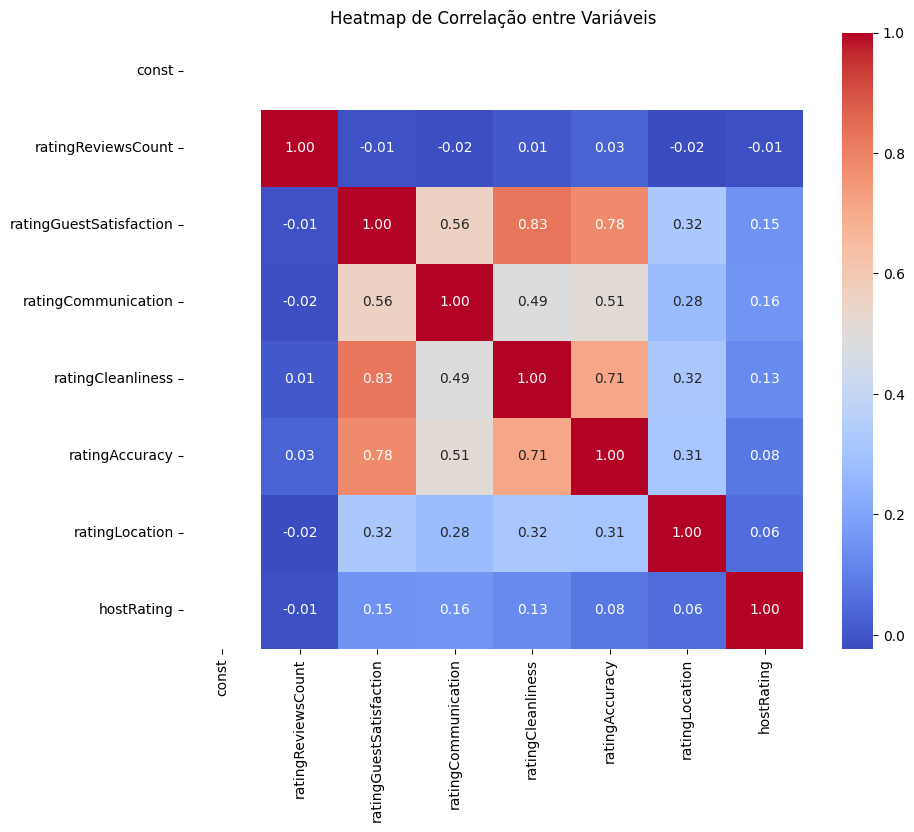

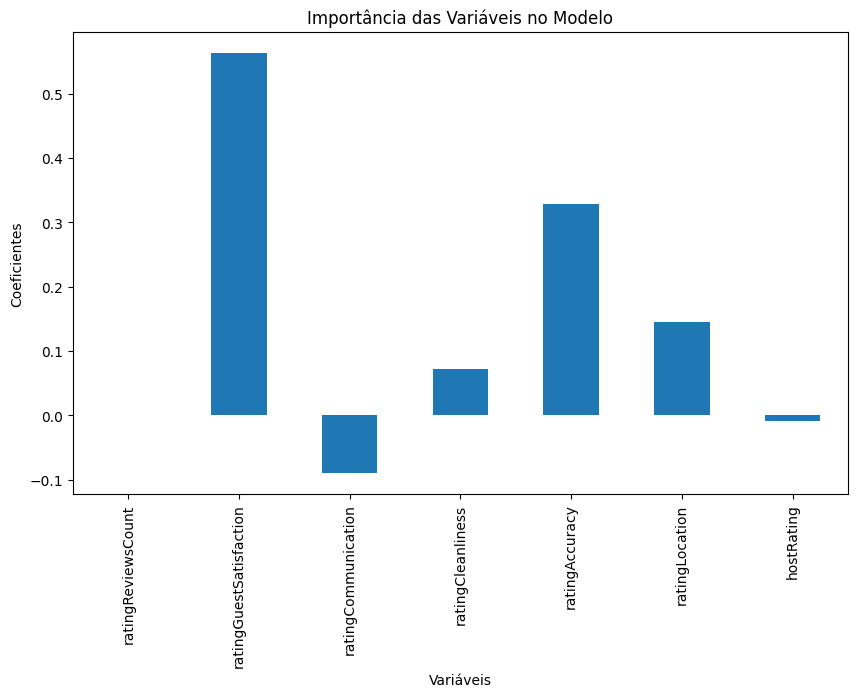

In [83]:
# 1. Correlação entre as variáveis (heatmap)
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação entre Variáveis')
plt.show()

# 2. Importância das variáveis no modelo (gráfico de barras)
coefficients = model.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()


                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          4.12e-102
Time:                        21:51:26   Log-Likelihood:                 94.519
No. Observations:                 346   AIC:                            -173.0
Df Residuals:                     338   BIC:                            -142.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

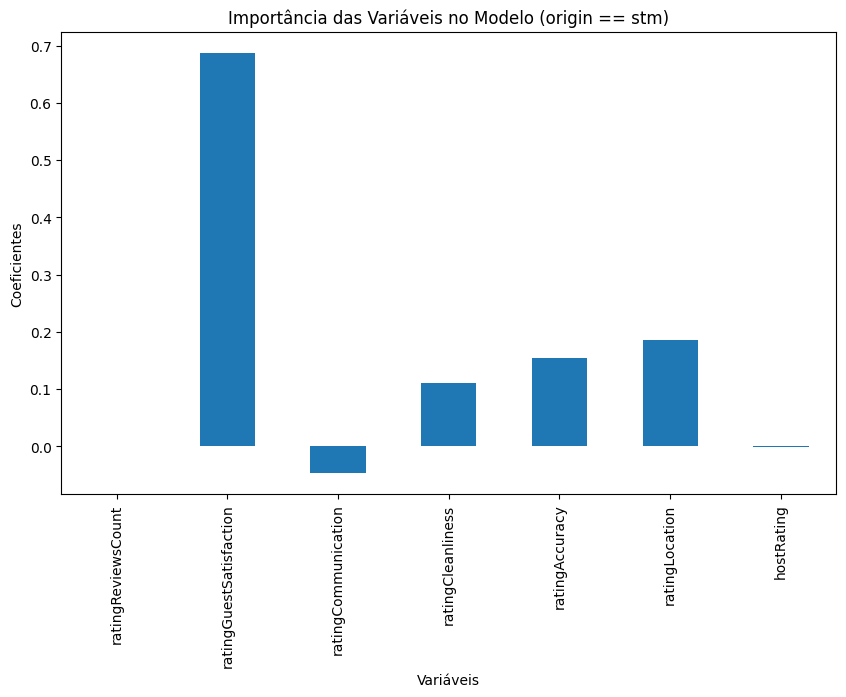

In [84]:
# Filtrar dados para origin == 'stm'
stm_data = database[database['origin'] == 'stm']

# Selecionar as colunas de características e a coluna alvo
X_stm = stm_data[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y_stm = stm_data.loc[X_stm.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X_stm = sm.add_constant(X_stm)

# Ajustar o modelo de regressão linear múltipla
model_stm = sm.OLS(y_stm, X_stm).fit()

# Exibir o resumo do modelo
print(model_stm.summary())

# Importância das variáveis no modelo (gráfico de barras)
coefficients_stm = model_stm.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients_stm.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo (origin == stm)')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     67.08
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           3.90e-62
Time:                        21:52:18   Log-Likelihood:                 249.89
No. Observations:                 380   AIC:                            -483.8
Df Residuals:                     372   BIC:                            -452.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

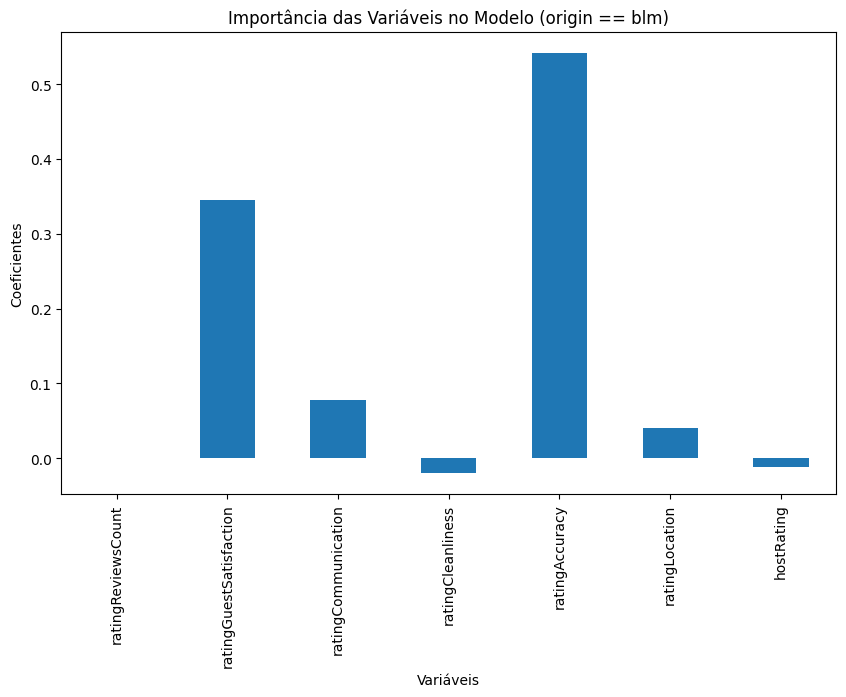

In [85]:
# Filtrar dados para origin == 'blm'
blm_data = database[database['origin'] == 'blm']

# Selecionar as colunas de características e a coluna alvo
X_blm = blm_data[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y_blm = blm_data.loc[X_blm.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X_blm = sm.add_constant(X_blm)

# Ajustar o modelo de regressão linear múltipla
model_blm = sm.OLS(y_blm, X_blm).fit()

# Exibir o resumo do modelo
print(model_blm.summary())

# Importância das variáveis no modelo (gráfico de barras)
coefficients_blm = model_blm.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients_blm.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo (origin == blm)')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()